# Human Activity Recognition Using Smartphones: Feature Engineering Techniques and Stacking/Ensemble Models for Accurate Classification

This project aims to develop a model that accurately recognizes human activity based on data collected from smartphones. The dataset contains 563 different features and 8239 data points. In this project, we will be using different feature engineering techniques and classification models to accurately classify human activity into one of the six classes.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import time
import os
import csv

from datetime import datetime

In [2]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from mrmr import mrmr_classif

# Configuration options

The notebook is configured to run automatically run all the tuned models. All the configuration variables are defined below. The notebook executes by default using Variance Thresholding feature selection technique.

To run using the mRMR technique, change `do_mrmr` to `True` and `do_var_thr` to `False`.


In [3]:
variance = 0.07
n_comp = 100
best_n = 422

do_var_thr = True
do_mrmr = False
do_std_sca = False
do_pca = False

outfile = 'out_data_improved.csv'
train_data = '../data/train_data.csv'
train_labels = '../data/train_labels.csv'
test_data = '../data/test_data.csv'

In [4]:
df1 = pd.read_csv(train_data)
df2 = pd.read_csv(train_labels)

testdf = pd.read_csv(test_data)
testdf = testdf.drop(columns=['Unnamed: 0'])

print(f'df1 has shape {df1.shape} while df2 has shape {df2.shape}')
print(f'df2 has {len(df2.columns)} namely {df2.columns[0]} and {df2.columns[1]}')

common_col = 'Unnamed: 0'
print(f"Merging df1 with df2 with '{common_col}' as the common column.")
df = pd.merge(df1, df2, on=common_col)
print(f'The shape of the merged df is now {df.shape}')

df1 has shape (8239, 563) while df2 has shape (8239, 2)
df2 has 2 namely Unnamed: 0 and Activity
Merging df1 with df2 with 'Unnamed: 0' as the common column.
The shape of the merged df is now (8239, 564)


In [5]:
# Dropping column not needed
df = df.drop(columns=['Unnamed: 0'])
print(df.shape)
df

(8239, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.286433,-0.023843,-0.122738,-0.915584,-0.710794,-0.880226,-0.932429,-0.720314,-0.881657,-0.789914,...,-0.752582,-0.217502,0.229826,0.154791,-0.431134,-0.761361,0.250580,-0.046895,3,STANDING
1,0.333258,-0.001307,-0.166581,-0.034498,-0.062471,-0.283268,-0.059698,-0.174912,-0.338661,0.283234,...,0.048713,-0.191360,-0.580316,-0.423810,0.689597,-0.765469,0.237371,-0.067771,22,WALKING
2,0.266797,-0.018683,-0.101142,-0.990874,-0.989001,-0.987255,-0.991659,-0.987859,-0.985430,-0.936624,...,-0.703577,-0.152601,0.162091,-0.628052,0.551795,0.587768,-0.536508,-0.469193,24,LAYING
3,0.276363,-0.020289,-0.113701,-0.995733,-0.939094,-0.984418,-0.997013,-0.936180,-0.983728,-0.938433,...,-0.430753,0.029986,-0.094248,0.025219,-0.408070,-0.819227,0.213794,-0.031301,22,STANDING
4,0.268231,-0.004146,-0.094503,0.473123,0.452403,-0.152600,0.450082,0.482764,-0.239383,0.539911,...,-0.558550,0.278372,0.363240,0.885432,0.848414,-0.779760,0.249384,0.035484,19,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8234,0.270511,-0.011321,-0.111377,-0.988057,-0.961229,-0.951407,-0.989752,-0.958753,-0.965050,-0.934746,...,-0.615815,-0.353490,-0.081501,0.181517,-0.180534,0.658690,-0.091334,0.961636,10,LAYING
8235,0.260897,-0.017322,-0.103011,-0.988656,-0.990926,-0.989076,-0.989816,-0.990775,-0.988472,-0.932550,...,-0.667159,-0.079052,-0.107393,-0.547206,0.564335,0.435081,-0.503752,-0.485656,24,LAYING
8236,0.278648,-0.020038,-0.118590,-0.983932,-0.912261,-0.955945,-0.987130,-0.917041,-0.957747,-0.921052,...,0.146016,-0.068825,-0.060211,-0.727493,-0.655778,-0.795575,0.238281,-0.000787,28,STANDING
8237,0.283642,-0.006992,-0.129778,-0.994152,-0.954562,-0.951844,-0.995321,-0.955989,-0.944934,-0.934076,...,-0.881097,-0.051389,-0.015944,-0.759481,-0.805523,-0.864310,0.188362,0.044799,24,STANDING


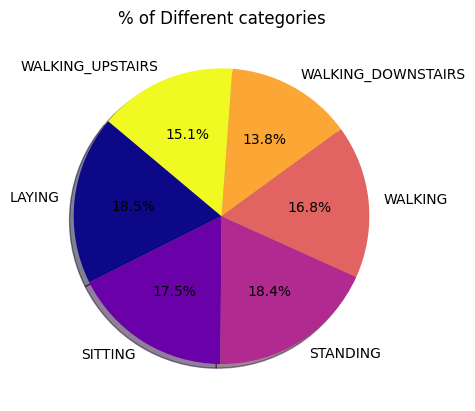

In [6]:
df['Activity'].groupby(df['Activity']).count()
activity = df['Activity'].groupby(df['Activity']).count().index
activity_data = df['Activity'].groupby(df['Activity']).count().values
colors = plt.cm.plasma(np.linspace(0, 1, len(activity_data)))
plt.pie(activity_data, labels=activity,  colors= colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Different categories")
plt.show()

In [7]:
print(df.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [8]:
X = df.drop(['Activity'],axis=1)
y = df['Activity']

## Preprocessing

We now perform variance thresholding on the data and remove features having variance less than 0.8 as found out in a previous python script in `trial1`.

In [9]:
def variance_thresholder(variance):
    global X
    # selection = VarianceThreshold(threshold=(variance))    
    # X = selection.fit_transform(X)
    # print(f'variance_thresholder() returned X with shape {X.shape}')
    
    vt = VarianceThreshold(threshold=variance)
    vt.fit(X)
    mask = vt.get_support()
    X = X.loc[:, mask]
    print(f'variance_thresholder() returned X with shape {X.shape}')

In [10]:
def mrmr(best_n):
    global X, y
    selected_features = mrmr_classif(X=X, y=y, K=best_n)
    X = X[X.columns.intersection(selected_features)]

In [11]:
def standard_scaler():
    global X_train, X_test, testdf
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    testdf = sc.transform(testdf)

In [12]:
def pc_analyzer(n):
    global X_train, X_test
    pca = PCA(n_components=n)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

## Classification

In [13]:
def classify(clfname, clf):
    
    start_time = time.time()
    
    print(clfname, end='\t')
    clf.fit(X_train, y_train) # Train model

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    end_time = time.time()
    time_diff = end_time - start_time
    
    performance = {}
    
    performance['clfname'] = clfname
    
    if do_var_thr:
        performance['variance_threshold'] = variance
    else:
        performance['variance_threshold'] = 0
    
    if do_mrmr:
        performance['mrmr'] = best_n
    else:
        performance['mrmr'] = 0

    performance['standard_scaler'] = do_std_sca
        
    if do_pca:
        performance['pca_n'] = n_comp
    else:
        performance['pca_n'] = 0
    
    performance['time'] = time_diff
    performance['train_accuracy'] = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    performance['train_precision'] = precision_score(y_train,y_train_pred,average = 'macro')
    performance['train_recall'] = recall_score(y_train,y_train_pred,average = 'macro')
    performance['train_mcc'] = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
    performance['train_f1'] = f1_score(y_train, y_train_pred, average='macro') # Calculate F1-score
    performance['test_accuracy'] = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    performance['test_precision'] = precision_score(y_test,y_test_pred,average = 'macro')
    performance['test_recall'] = recall_score(y_test,y_test_pred,average = 'macro')
    performance['test_mcc'] = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
    performance['test_f1'] = f1_score(y_test, y_test_pred, average='macro') # Calculate F1-score
    
    clf_out_data.append(performance)
    
    print(f'✓ ({time_diff} s)')

    print(confusion_matrix(y_test, y_test_pred))

## Build Classification models

In [14]:
all_start = time.time()

if do_var_thr:
    variance_thresholder(variance)

if do_mrmr:
    mrmr(best_n)

selected_columns = list(X.columns.values)
testdf = testdf[selected_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

if do_std_sca:
    standard_scaler()
    
if do_pca:
    pc_analyzer(n_comp)

knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
svm_rbf = SVC(kernel='rbf', C= 5, gamma= 0.01, random_state=42)
dt = DecisionTreeClassifier(ccp_alpha= 0.001, criterion= 'entropy', max_depth= None, max_features= 100, random_state=42)
rf = RandomForestClassifier(ccp_alpha= 0.001, criterion= 'log_loss', max_depth= None, n_estimators= 500, random_state=42)
mlp = MLPClassifier(activation= 'tanh', alpha= 0.0001, max_iter= 500, solver= 'adam', random_state=42)

# knn = KNeighborsClassifier()
# svm_rbf = SVC()
# dt = DecisionTreeClassifier()
# rf = RandomForestClassifier()
# mlp = MLPClassifier()

estimator_list = [('mlp', mlp), ('svm_rbf', svm_rbf), ('rf', rf), ('knn', knn)]

stack_model = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression(solver='liblinear'))

classifiers = [knn, svm_rbf, dt, rf, mlp, stack_model]
clf_names = ['knn', 'svm_rbf', 'dt', 'rf', 'mlp', 'stack']

clf_out_data = []

perf_cols = ['clfname', 'variance_threshold', 'mrmr', 'standard_scaler', 'pca_n', 'time', 'train_accuracy', 'train_precision', 'train_recall', 'train_mcc', 'train_f1', 'test_accuracy', 'test_precision', 'test_recall', 'test_mcc', 'test_f1']

for clf in range(len(classifiers)):
    classify(clf_names[clf], classifiers[clf])
    
all_end = time.time()
total_time = all_end - all_start
print(f'Total time taken: {total_time}')

variance_thresholder() returned X with shape (8239, 280)
knn	✓ (0.941314697265625 s)
[[305   0   0   0   0   0]
 [  3 255  30   0   0   0]
 [  0  25 278   0   0   0]
 [  0   0   0 276   0   1]
 [  0   0   0   1 226   0]
 [  0   0   0   0   0 248]]
svm_rbf	✓ (6.153971910476685 s)
[[305   0   0   0   0   0]
 [  0 277  11   0   0   0]
 [  0   8 295   0   0   0]
 [  0   0   0 277   0   0]
 [  0   0   0   0 227   0]
 [  0   0   0   0   0 248]]
dt	✓ (0.7482390403747559 s)
[[305   0   0   0   0   0]
 [  0 273  15   0   0   0]
 [  0  21 282   0   0   0]
 [  0   0   0 257   9  11]
 [  0   0   0   9 206  12]
 [  0   3   0   6  10 229]]
rf	✓ (45.60383915901184 s)
[[305   0   0   0   0   0]
 [  0 282   6   0   0   0]
 [  0  13 290   0   0   0]
 [  0   0   0 273   2   2]
 [  0   0   0   4 221   2]
 [  0   0   0   1   5 242]]
mlp	✓ (32.968486070632935 s)
[[305   0   0   0   0   0]
 [  0 285   3   0   0   0]
 [  0  11 292   0   0   0]
 [  0   0   0 277   0   0]
 [  0   0   0   2 224   1]
 [  0   0   

In [15]:
with open(outfile, mode='a', newline='') as file:
    writer = csv.writer(file)
    if os.stat(outfile).st_size == 0:
        writer.writerow(perf_cols)
    writer.writerows([entry.values() for entry in clf_out_data])

In [16]:
prediction = list(stack_model.predict(testdf))

In [17]:
print(len(prediction))

2060


In [18]:
with open('predicted.txt', mode='a', newline='') as file:
    writer = csv.writer(file)
    writer.writerows([[i, prediction[i]] for i in range(len(prediction))])

mRMR Total time taken: 553.9091100692749

Without feature engineering Total time taken: 528.2790336608887

Variance Thresholding Total time taken: 494.20610761642456